In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns


In [ ]:
df=pd.read_excel(r"C:\Users\vedan\OneDrive\Desktop\Python viz\Bruno_leicester\Bruno_bruno_dfing_1.xlsx")

In [14]:
df['x']=df['x']*1.2
df['y']=df['y']*0.8

df['end_x']=df['end_x']*1.2
df['end_y']=df['end_y']*0.8

In [15]:
df

,league,season,game,game_id,period,minute,second,expanded_minute,type,outcome_type,...,goal_mouth_z,blocked_x,blocked_y,qualifiers,is_touch,is_shot,is_goal,card_type,related_event_id,related_player_id
0,ENG-Premier League,2425,2025-03-16 Leicester-Manchester United,1821181,FirstHalf,0,0.0,0,Start,Successful,...,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN
1,ENG-Premier League,2425,2025-03-16 Leicester-Manchester United,1821181,FirstHalf,0,0.0,0,Start,Successful,...,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN
2,ENG-Premier League,2425,2025-03-16 Leicester-Manchester United,1821181,FirstHalf,0,0.0,0,Pass,Successful,...,NaN,NaN,NaN,"[{'type': {'displayName': 'Angle', 'value': 21...",True,NaN,NaN,NaN,NaN,NaN
3,ENG-Premier League,2425,2025-03-16 Leicester-Manchester United,1821181,FirstHalf,0,9.0,0,Pass,Successful,...,NaN,NaN,NaN,"[{'type': {'displayName': 'Longball', 'value':...",True,NaN,NaN,NaN,NaN,NaN
4,ENG-Premier League,2425,2025-03-16 Leicester-Manchester United,1821181,FirstHalf,0,11.0,0,Pass,Unsuccessful,...,NaN,NaN,NaN,"[{'type': {'displayName': 'PassEndX', 'value':...",True,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,ENG-Premier League,2425,2025-03-16 Leicester-Manchester United,1821181,SecondHalf,98,55.0,100,End,Successful,...,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN
1717,ENG-Premier League,2425,2025-03-16 Leicester-Manchester United,1821181,PostGame,0,0.0,10,End,Successful,...,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN
1718,ENG-Premier League,2425,2025-03-16 Leicester-Manchester United,1821181,PostGame,0,0.0,10,End,Successful,...,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN
1719,ENG-Premier League,2425,2025-03-16 Leicester-Manchester United,1821181,PreMatch,0,0.0,0,FormationSet,Successful,...,NaN,NaN,NaN,[{'type': {'displayName': 'TeamPlayerFormation...,False,NaN,NaN,NaN,NaN,NaN


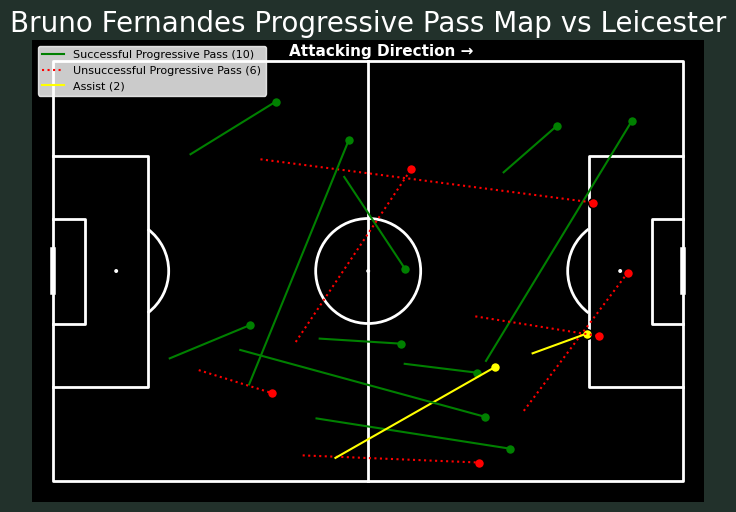

In [46]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch

fig, ax = plt.subplots(figsize=(13.5, 6))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_color='black', line_color='white', stripe=False)
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

# Filter dataset for Bruno Fernandes and only Progressive Passes
bruno_df = df[(df['player'] == 'Bruno Fernandes') & (df['type'] == 'Pass')]

# Define a pass as progressive if it moves forward by at least 5 meters
P_Pass = bruno_df[(bruno_df['end_x'] - bruno_df['x']) > 10]

# Count progressive passes by outcome
assist_count = len(P_Pass[P_Pass['outcome_type'] == 'Assist'])
successful_count = len(P_Pass[P_Pass['outcome_type'] == 'Successful'])
unsuccessful_count = len(P_Pass[P_Pass['outcome_type'] == 'Unsuccessful'])

legend_handles = {}
for _, row in P_Pass.iterrows():
    if row['outcome_type'] == 'Assist':
        line, = plt.plot((row['x'], row['end_x']), (row['y'], row['end_y']), color='yellow')
        plt.scatter(row['end_x'], row['end_y'], color='yellow', edgecolor='black', s=50)  # Dot at the end
        legend_handles[f'Assist ({assist_count})'] = line  # Store handle for legend
    
    elif row['outcome_type'] == 'Successful':
        line, = plt.plot((row['x'], row['end_x']), (row['y'], row['end_y']), color='green')
        plt.scatter(row['end_x'], row['end_y'], color='green', edgecolor='black', s=50)  # Dot at the end
        legend_handles[f'Successful Progressive Pass ({successful_count})'] = line
    
    elif row['outcome_type'] == 'Unsuccessful':
        line, = plt.plot((row['x'], row['end_x']), (row['y'], row['end_y']), color='red', linestyle='dotted')
        plt.scatter(row['end_x'], row['end_y'], color='red', edgecolor='black', s=50)  # Dot at the end
        legend_handles[f'Unsuccessful Progressive Pass ({unsuccessful_count})'] = line

plt.text(45, 81, "Attacking Direction →", color='white', fontsize=11, fontweight='bold')
plt.legend(legend_handles.values(), legend_handles.keys(), loc='upper left', fontsize=8, frameon=True, facecolor='white', edgecolor='white')

plt.title('Bruno Fernandes Progressive Pass Map vs Leicester', color='White', size=20)
plt.show()
